## JPMaQS 양자 지표

In [1]:
%%capture
! pip install git+https://github.com/macrosynergy/macrosynergy@develop

In [2]:
import numpy as np
import pandas as pd

import macrosynergy.management as msm
import macrosynergy.panel as msp
import macrosynergy.signal as mss
import macrosynergy.pnl as msn

from macrosynergy.download import JPMaQSDownload

from timeit import default_timer as timer
from datetime import timedelta, date

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('/Users/leejieun/kaggle-notebooks/datasets/macrosynergy/fixed-income-returns-and-macro-trends/JPMaQS_Quantamental_Indicators.csv', index_col=0, parse_dates=['real_date'])

In [4]:
df

,real_date,cid,xcat,value,grading,eop_lag,mop_lag
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0
1,2000-01-04,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,96.0,293.0
2,2000-01-05,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,97.0,294.0
3,2000-01-06,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,98.0,295.0
4,2000-01-07,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,99.0,296.0
...,...,...,...,...,...,...,...
3390054,2023-12-07,ZAR,RYLDIRS05Y_NSA,3.202751,1.0,0.0,0.0
3390055,2023-12-08,ZAR,RYLDIRS05Y_NSA,3.254227,1.0,0.0,0.0
3390056,2023-12-11,ZAR,RYLDIRS05Y_NSA,3.344046,1.0,0.0,0.0
3390057,2023-12-12,ZAR,RYLDIRS05Y_NSA,3.283972,1.0,0.0,0.0


In [5]:
df.head()

,real_date,cid,xcat,value,grading,eop_lag,mop_lag
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0
1,2000-01-04,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,96.0,293.0
2,2000-01-05,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,97.0,294.0
3,2000-01-06,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,98.0,295.0
4,2000-01-07,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,99.0,296.0


In [6]:
df.tail()

,real_date,cid,xcat,value,grading,eop_lag,mop_lag
3390054,2023-12-07,ZAR,RYLDIRS05Y_NSA,3.202751,1.0,0.0,0.0
3390055,2023-12-08,ZAR,RYLDIRS05Y_NSA,3.254227,1.0,0.0,0.0
3390056,2023-12-11,ZAR,RYLDIRS05Y_NSA,3.344046,1.0,0.0,0.0
3390057,2023-12-12,ZAR,RYLDIRS05Y_NSA,3.283972,1.0,0.0,0.0
3390058,2023-12-13,ZAR,RYLDIRS05Y_NSA,3.279850,1.0,0.0,0.0


In [7]:
df.shape

(3390059, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390059 entries, 0 to 3390058
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   real_date  datetime64[ns]
 1   cid        object        
 2   xcat       object        
 3   value      float64       
 4   grading    float64       
 5   eop_lag    float64       
 6   mop_lag    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 206.9+ MB


In [10]:
df.describe()

,real_date,value,grading,eop_lag,mop_lag
count,3390059,3.390059e+06,3.390059e+06,3.390059e+06,3.390059e+06
mean,2012-07-24 03:36:56.965662720,1.977237e+00,1.366171e+00,1.715745e+01,1.412662e+02
min,2000-01-03 00:00:00,-4.894521e+01,1.000000e+00,-3.000000e+01,-1.500000e+01
25%,2006-12-26 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2012-09-19 00:00:00,7.496109e-01,1.000000e+00,0.000000e+00,2.900000e+01
75%,2018-05-04 00:00:00,2.846841e+00,2.000000e+00,3.100000e+01,2.250000e+02
max,2023-12-14 00:00:00,3.940715e+02,3.000000e+00,3.550000e+02,1.450000e+03
std,NaN,4.441622e+00,5.322838e-01,2.811768e+01,2.457459e+02


In [20]:
len(df.columns)

7

In [21]:
len(df)

3390059

In [22]:
df.size

23730413

In [23]:
ecos = [
    "CPIC_SA_P1M1ML12",
    "CPIC_SJA_P3M3ML3AR",
    "CPIC_SJA_P6M6ML6AR",
    "CPIH_SA_P1M1ML12",
    "CPIH_SJA_P3M3ML3AR",
    "CPIH_SJA_P6M6ML6AR",
    "INFTEFF_NSA",
    "INTRGDP_NSA_P1M1ML12_3MMA",
    "INTRGDPv5Y_NSA_P1M1ML12_3MMA",
    "PCREDITGDP_SJA_D1M1ML12",
    "RGDP_SA_P1Q1QL4_20QMA",
    "RYLDIRS02Y_NSA",
    "RYLDIRS05Y_NSA",
    "PCREDITBN_SJA_P1M1ML12",
]
mkts = [
    "DU02YXR_NSA",
    "DU05YXR_NSA",
    "DU02YXR_VT10",
    "DU05YXR_VT10",
    "EQXR_NSA",
    "EQXR_VT10",
    "FXXR_NSA",
    "FXXR_VT10",
    "FXCRR_NSA",
    "FXTARGETED_NSA",
    "FXUNTRADABLE_NSA",
]

xcats = ecos + mkts

In [24]:
cids_dm = ["AUD", "CAD", "CHF", "EUR", "GBP", "JPY", "NOK", "NZD", "SEK", "USD"]
cids_em = [
    "CLP",
    "COP",
    "CZK",
    "HUF",
    "IDR",
    "ILS",
    "INR",
    "KRW",
    "MXN",
    "PLN",
    "THB",
    "TRY",
    "TWD",
    "ZAR",
]
cids = cids_dm + cids_em

In [25]:
display(df['xcat'].unique())
display(df['cid'].unique())
df['ticker'] = df['cid'] + '_' + df['xcat']
df.head(3)

array(['CPIC_SA_P1M1ML12', 'CPIC_SJA_P3M3ML3AR', 'CPIC_SJA_P6M6ML6AR',
       'CPIH_SA_P1M1ML12', 'CPIH_SJA_P3M3ML3AR', 'CPIH_SJA_P6M6ML6AR',
       'DU02YXR_NSA', 'DU02YXR_VT10', 'DU05YXR_NSA', 'DU05YXR_VT10',
       'EQXR_NSA', 'EQXR_VT10', 'FXCRR_NSA', 'FXTARGETED_NSA',
       'FXUNTRADABLE_NSA', 'FXXR_NSA', 'FXXR_VT10', 'INFTEFF_NSA',
       'INTRGDP_NSA_P1M1ML12_3MMA', 'INTRGDPv5Y_NSA_P1M1ML12_3MMA',
       'PCREDITBN_SJA_P1M1ML12', 'PCREDITGDP_SJA_D1M1ML12',
       'RGDP_SA_P1Q1QL4_20QMA', 'RYLDIRS02Y_NSA', 'RYLDIRS05Y_NSA'],
      dtype=object)

array(['AUD', 'CAD', 'CHF', 'CLP', 'COP', 'CZK', 'EUR', 'GBP', 'HUF',
       'IDR', 'ILS', 'INR', 'JPY', 'KRW', 'MXN', 'NOK', 'NZD', 'PLN',
       'SEK', 'THB', 'TRY', 'TWD', 'USD', 'ZAR'], dtype=object)

,real_date,cid,xcat,value,grading,eop_lag,mop_lag,ticker
0,2000-01-03,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,95.0,292.0,AUD_CPIC_SA_P1M1ML12
1,2000-01-04,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,96.0,293.0,AUD_CPIC_SA_P1M1ML12
2,2000-01-05,AUD,CPIC_SA_P1M1ML12,1.244168,2.0,97.0,294.0,AUD_CPIC_SA_P1M1ML12


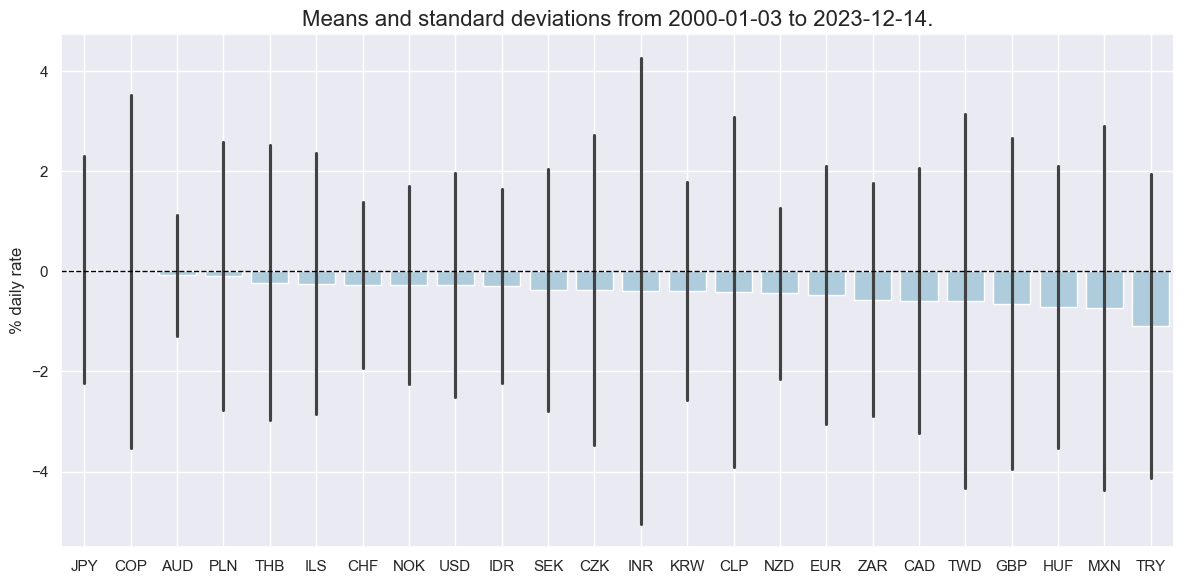

ValueError: `xcat_labels` must have same length as `xcats` (or one extra label if `cs_mean` is True).

In [26]:
xcatx = ['INTRGDPv5Y_NSA_P1M1ML12_3MMA']

msp.view_ranges(
    df,
    cids=cids,
    xcats=xcatx,
    size=(12,6),
    kind='bar',
    sort_cids_by='mean',
    ylab='% daily rate',
    start='2000-01-01',
)
msp.view_timelines(
    df,
    xcats=xcatx,
    cids=cids,
    ncol=4,
    cumsum=False,
    start="2000-01-01",
    same_y=False,
    aspect=1.75,
    size=(12, 12),
    all_xticks=False,
    title_adj=1.02,
    label_adj=0.05,
    title="Latest economic growth trend (intuitive quantamental measure) in excess of 5-year median, % oya, 3-month average",
    xcat_labels=["% over a year ago", "% 6m/6m, saar", "% 3m/3m, saar"],
)

In [28]:
xcatx = ['INFTEFF_NSA']
filt1=df['xcat'].isin(xcatx)
dfb=df[filt1]

infs = [
    "CPIC_SJA_P6M6ML6AR",
]

for inf in infs:
    calcs = [
        f"{inf}vIT = ( {inf} - INFTEFF_NSA )",
     ]
dfa = msp.panel_calculator(df, calcs, cids=cids)
df = msm.update_df(df, dfa)

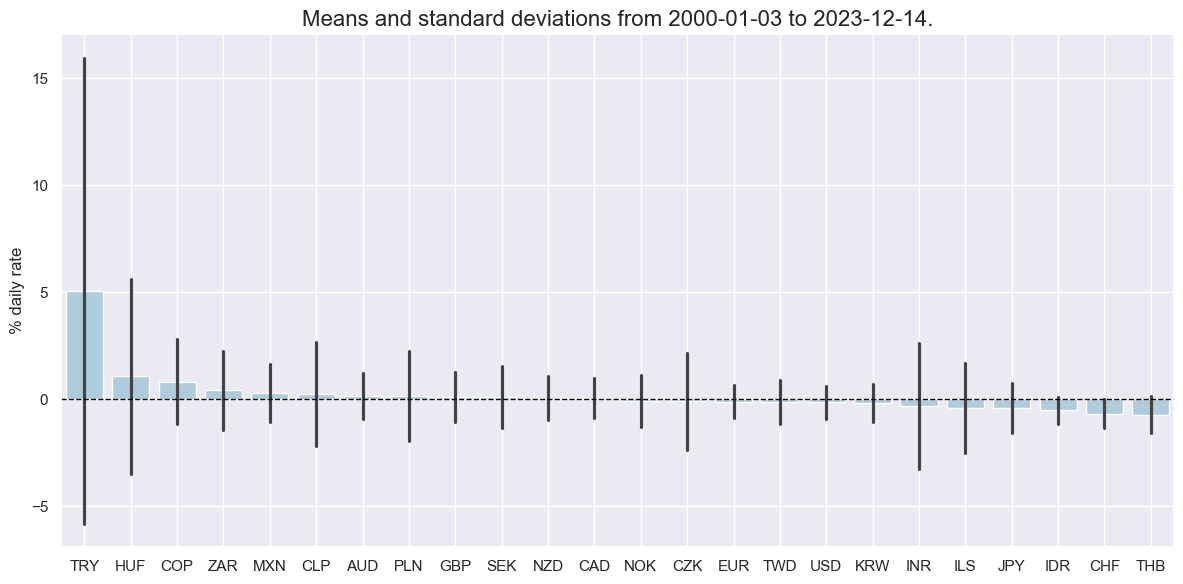

ValueError: `xcat_labels` must have same length as `xcats` (or one extra label if `cs_mean` is True).

In [29]:
xcatx = ["CPIC_SJA_P6M6ML6ARvIT"]

msp.view_ranges( 
    df,
    cids=cids,
    xcats=xcatx,
    size = (12, 6),
    kind="bar",
    sort_cids_by="mean",
    ylab="% daily rate",
    start="2000-01-01",
)
msp.view_timelines(
    df,
    xcats=xcatx,
    cids=cids,
    ncol=4,
    cumsum=False,
    start="2000-01-01",
    same_y=False,
    aspect=1.75,
    size=(12, 12),
    all_xticks=False,
    title_adj=1.02,
    label_adj=0.05,
    title="CPI inflation rates, %ar, versus effective inflation target, market information state",
    xcat_labels=["% over a year ago", "% 6m/6m, saar", "% 3m/3m, saar"],
)

In [27]:
cra = msp.CategoryRelations(
    df,
    xcats=['XGCI', 'DU02YXR_NSA'],
    cids=cids_dm[2:6],
    freq='A',
    lag=0,
    xcat_aggs=['mean', 'mean'],
    start='2002-01-01',
    xcat_trims=[None, None],
)
cra.reg_scatter(
    labels=True,
    coef_box='upper left',
    title="G4: Simple macro trends versus market trends, annual averages, 2002-2022",
    xlab="Sum of growth and inflation shortfall trends, %ar",
    ylab="Standard 50-day versus 200-day moving average IRS return trend, %",
)

XGCI misses: ['CHF', 'EUR', 'GBP', 'JPY'].


ValueError: The two categories have no shared cross-sections.
Possible reason(s) for error: XGCI misses: ['CHF', 'EUR', 'GBP', 'JPY'].
Please check input parameters.